In [3]:
import sys
import tensorflow as tf
tf.enable_eager_execution() 
import utils.dataset_gen as dsg
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ds = dsg.office31_datasets('A','D')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Visualise some samples

In [5]:
def show_batch(image_batch, label_batch, batch_size=16):
    plt.figure(figsize=(10,10))
    CLASS_NAMES = np.array(dsg.office31_class_names())
    for n in range(batch_size):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

In [6]:
si = iter(dsg.prep_train(ds['source']['train']['ds']))

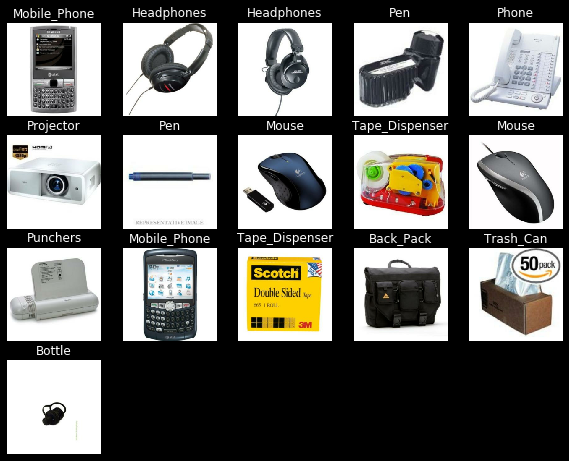

In [7]:
image_batch, label_batch = next(si)
show_batch(image_batch.numpy(), label_batch.numpy())

In [8]:
ti = iter(dsg.prep_train(ds['target']['train']['ds']))

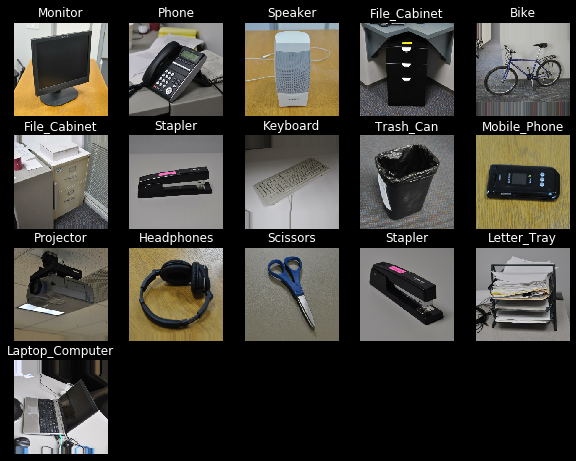

In [9]:
image_batch, label_batch = next(ti)
show_batch(image_batch.numpy(), label_batch.numpy())

## Check that combi dataset works

In [15]:
ds_combo, _ = dsg.da_combi_dataset(ds['source']['train']['ds'], ds['target']['train']['ds'], ratio=1)

In [16]:
dsi_combo = iter(dsg.prep_train(ds_combo, batch_size=4))

In [17]:
s_dat, s_lbl, t_dat, t_lbl, eq = next(dsi_combo)
eq.numpy()

array([False, False, False, False])

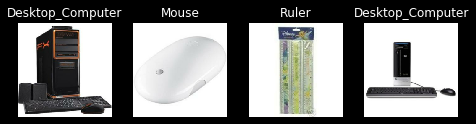

In [18]:
show_batch(s_dat.numpy(), s_lbl.numpy(), 4)

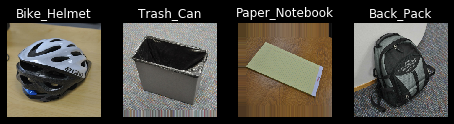

In [19]:
show_batch(t_dat.numpy(), t_lbl.numpy(), 4)